In [1]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                     "apikey":"UmH36wZ05c7Y8sHKX0hT46II80oRbd5YZtuhSGrMbSdv"
}
client = APIClient(wml_credentials)

In [2]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [3]:
space_uid = guid_from_space_name(client,'IBMImageClassificationModel')
print("Space uid = ", space_uid)

Space uid =  f2e92fb4-0cc5-4b0f-8513-080137c29b49


In [4]:
client.set.default_space(space_uid)

'SUCCESS'

In [5]:
client.repository.download('997ddf5c-d58e-4cc2-85e3-324254945d3d','gesture.tar.gz')

Successfully saved model content to file: 'gesture.tar.gz'


'D:\\College\\7th semester\\ibm\\Project Development Phase\\Sprint 4\\Train the model on IBM\\Model Training on IBM/gesture.tar.gz'

In [6]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing import image
test_model = load_model('gesture.h5')
img_path=r"D:\College\7th semester\ibm\Project Development Phase\Sprint 4\Train the model on IBM\Model Training on IBM\test_image2.jpg"

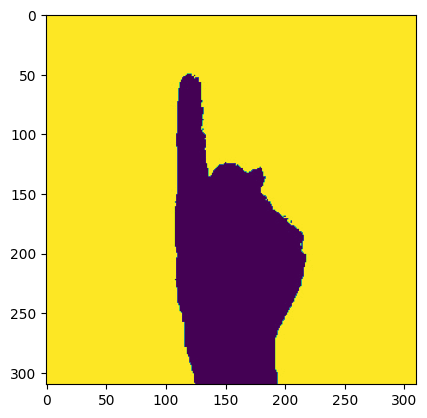

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [8]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [9]:
type(res)

numpy.ndarray

In [10]:
import numpy as np
res = np.expand_dims(res,axis=0)

In [11]:
res.shape

(1, 64, 64, 1)

In [12]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 101ms/step


array([1], dtype=int64)

In [13]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'1'

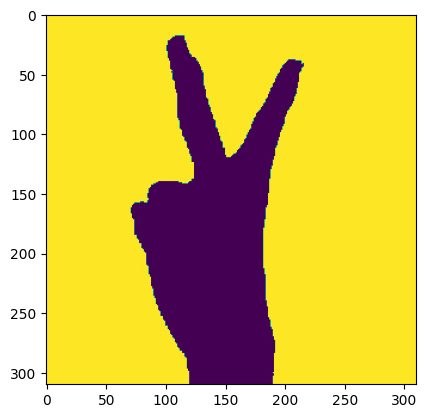

In [14]:
img_path=r"D:\College\7th semester\ibm\Project Development Phase\Sprint 4\Train the model on IBM\Model Training on IBM\test_image.jpg"
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [15]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [16]:
type(res)

numpy.ndarray

In [17]:
import numpy as np
res = np.expand_dims(res,axis=0)

In [18]:
res.shape

(1, 64, 64, 1)

In [19]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 20ms/step


array([2], dtype=int64)

In [20]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'2'